In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
data=pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


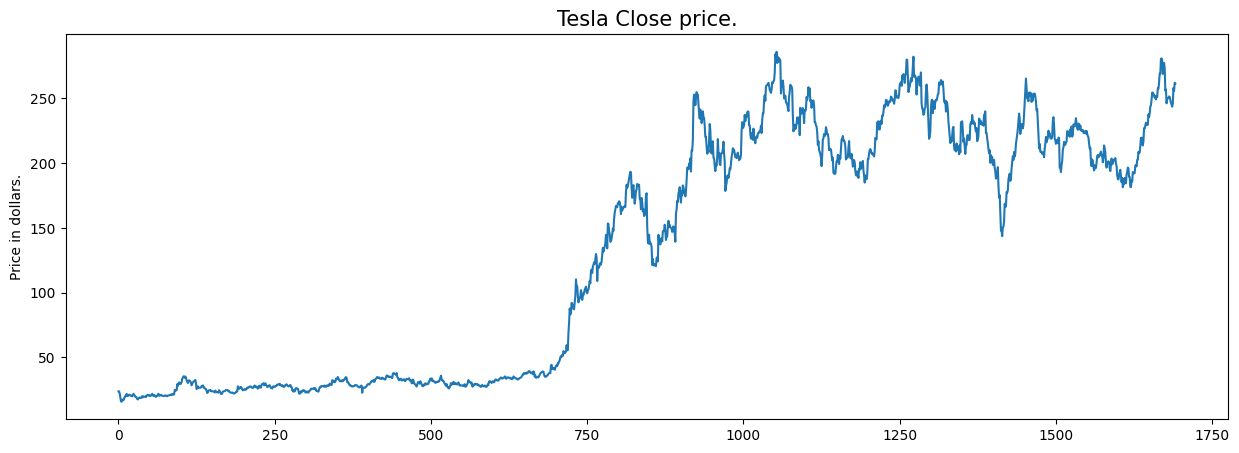

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:
data = data.drop(['Adj Close'], axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1692 non-null   object 
 1   Open    1692 non-null   float64
 2   High    1692 non-null   float64
 3   Low     1692 non-null   float64
 4   Close   1692 non-null   float64
 5   Volume  1692 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 79.4+ KB


In [ ]:
splitted = data['Date'].str.split('/', expand=True)

data['day'] = splitted[1].astype('int')
data['month'] = splitted[0].astype('int')
data['year'] = splitted[2].astype('int')

data.head()


,Date,Open,High,Low,Close,Volume,open-close,low-high,target,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,-4.889999,-7.459999,0,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,1.960001,-7.120001,0,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,3.040001,-5.650000,0,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,3.799999,-4.390001,0,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,3.889999,-4.170000,0,6,7,2010


In [ ]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()


,Date,Open,High,Low,Close,Volume,open-close,low-high,target,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,-4.889999,-7.459999,0,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,1.960001,-7.120001,0,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,3.040001,-5.650000,0,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,3.799999,-4.390001,0,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,3.889999,-4.170000,0,6,7,2010,0


In [ ]:
data['open-close'] = data['Open'] - data['Close']
data['low-high'] = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)


In [ ]:
features = data[['open-close', 'low-high','is_quarter_end']]
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1522, 3) (170, 3)


In [ ]:
print(features)

[[-1.32794273 -0.66020389  1.41046067]
 [ 0.52736418 -0.57665057  1.41046067]
 [ 0.81987972 -0.21540295 -0.70898822]
 ...
 [ 0.34048006 -0.4808082   1.41046067]
 [ 0.0913007  -0.47097981  1.41046067]
 [ 0.67362168  0.15813788  1.41046067]]


In [ ]:
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1687    1
1688    0
1689    1
1690    0
1691    0
Name: target, Length: 1692, dtype: int64


In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):

  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5191709844559586
Validation Accuracy :  0.5435330347144457

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4718497409326424
Validation Accuracy :  0.4462486002239642

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 